## Import Libraries

In [126]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import cmcrameri as cmc

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate

import shap

import warnings
warnings.filterwarnings('ignore')

In [31]:
pip list

Package                       Version
----------------------------- -----------
absl-py                       1.4.0
aiohttp                       3.8.4
aiosignal                     1.3.1
alabaster                     0.7.12
alembic                       1.10.3
altair                        4.2.2
anaconda-client               1.11.1
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
array-record                  0.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat       

In [32]:
#pip install streamlit==1.10.0

In [33]:
#pip install scikit-learn==1.0.2

In [34]:
# pip install seaborn

In [35]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print(" r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [36]:
df=pd.read_csv("final_scout_not_dummy.csv")
pd.set_option('display.max_columns',  None)
pd.options.display.float_format = '{:,.2f}'.format

In [37]:
df.head(1)
#df.sample()
#df.tail(1)

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,"56,013.00",Used,Diesel,7.00,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.00,2.00,66.00,1,Metallic,Cloth,Automatic,"1,422.00","1,220.00",front,3.80


In [38]:
df.shape

(15915, 23)

In [39]:
df.isnull().sum().any()

False

In [40]:
df.duplicated().sum()

1673

In [41]:
display(df.shape)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)
display(df.shape)

(15915, 23)

(14242, 23)

In [42]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

In [43]:
numerical= df.select_dtypes('number').columns
categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['price', 'km', 'Gears', 'age', 'Previous_Owners', 'hp_kW',
       'Inspection_new', 'Displacement_cc', 'Weight_kg', 'cons_comb'],
      dtype='object')


Categorical Columns: Index(['make_model', 'body_type', 'vat', 'Type', 'Fuel', 'Comfort_Convenience',
       'Entertainment_Media', 'Extras', 'Safety_Security', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object')


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14242 entries, 0 to 14241
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14242 non-null  object 
 1   body_type            14242 non-null  object 
 2   price                14242 non-null  int64  
 3   vat                  14242 non-null  object 
 4   km                   14242 non-null  float64
 5   Type                 14242 non-null  object 
 6   Fuel                 14242 non-null  object 
 7   Gears                14242 non-null  float64
 8   Comfort_Convenience  14242 non-null  object 
 9   Entertainment_Media  14242 non-null  object 
 10  Extras               14242 non-null  object 
 11  Safety_Security      14242 non-null  object 
 12  age                  14242 non-null  float64
 13  Previous_Owners      14242 non-null  float64
 14  hp_kW                14242 non-null  float64
 15  Inspection_new       14242 non-null 

In [45]:
df.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
count,"14,242.00","14,242.00","14,242.00","14,242.00","14,242.00","14,242.00","14,242.00","14,242.00","14,242.00","14,242.00"
mean,"18,100.97","32,582.11",5.94,1.42,1.04,88.71,0.26,"1,432.89","1,342.40",4.83
std,"7,421.21","36,856.86",0.70,1.11,0.34,26.55,0.44,277.51,201.25,0.86
min,"4,950.00",0.00,5.00,0.00,0.00,40.00,0.00,890.00,840.00,3.00
25%,"12,950.00","3,898.00",5.00,0.00,1.00,66.00,0.00,"1,229.00","1,165.00",4.10
50%,"16,950.00","21,000.00",6.00,1.00,1.00,85.00,0.00,"1,461.00","1,320.00",4.80
75%,"21,900.00","47,000.00",6.00,2.00,1.00,103.00,1.00,"1,598.00","1,487.00",5.40
max,"74,600.00","317,000.00",8.00,3.00,4.00,294.00,1.00,"2,967.00","2,471.00",9.10


In [46]:
df.describe(include="object").T

,count,unique,top,freq
make_model,14242,9,Audi A3,2758
body_type,14242,8,Sedans,7230
vat,14242,2,VAT deductible,13426
Type,14242,5,Used,10172
Fuel,14242,4,Benzine,7558
Comfort_Convenience,14242,6196,"Air conditioning,Electrical side mirrors,Hill ...",312
Entertainment_Media,14242,346,"Bluetooth,Hands-free equipment,On-board comput...",1562
Extras,14242,659,Alloy wheels,5010
Safety_Security,14242,4442,"ABS,Central door lock,Daytime running lights,D...",635
Paint_Type,14242,3,Metallic,13682


In [47]:
print("Number of Uniques:\n", df.select_dtypes('object').nunique(),'\n', sep='')

Number of Uniques:
make_model                9
body_type                 8
vat                       2
Type                      5
Fuel                      4
Comfort_Convenience    6196
Entertainment_Media     346
Extras                  659
Safety_Security        4442
Paint_Type                3
Upholstery_type           2
Gearing_Type              3
Drive_chain               3
dtype: int64



In [48]:
print("Number of Uniques:\n", df.select_dtypes('number').nunique(), '\n', sep='')

Number of Uniques:
price              2952
km                 6691
Gears                 4
age                   4
Previous_Owners       5
hp_kW                77
Inspection_new        2
Displacement_cc      68
Weight_kg           432
cons_comb            62
dtype: int64



In [49]:
df.Type.value_counts()

Type
Used              10172
New                1369
Pre-registered     1029
Employee's car      905
Demonstration       767
Name: count, dtype: int64

In [50]:
df.Fuel.value_counts()

Fuel
Benzine     7558
Diesel      6619
LPG/CNG       60
Electric       5
Name: count, dtype: int64

In [51]:
df.Paint_Type.value_counts()

Paint_Type
Metallic       13682
Uni/basic        549
Perl effect       11
Name: count, dtype: int64

In [52]:
df.Drive_chain.value_counts()

Drive_chain
front    14067
4WD        171
rear         4
Name: count, dtype: int64

In [53]:
df.body_type.unique()

array(['Sedans', 'Station wagon', 'Compact', 'Coupe', 'Van', 'Off-Road',
       'Convertible', 'Transporter'], dtype=object)

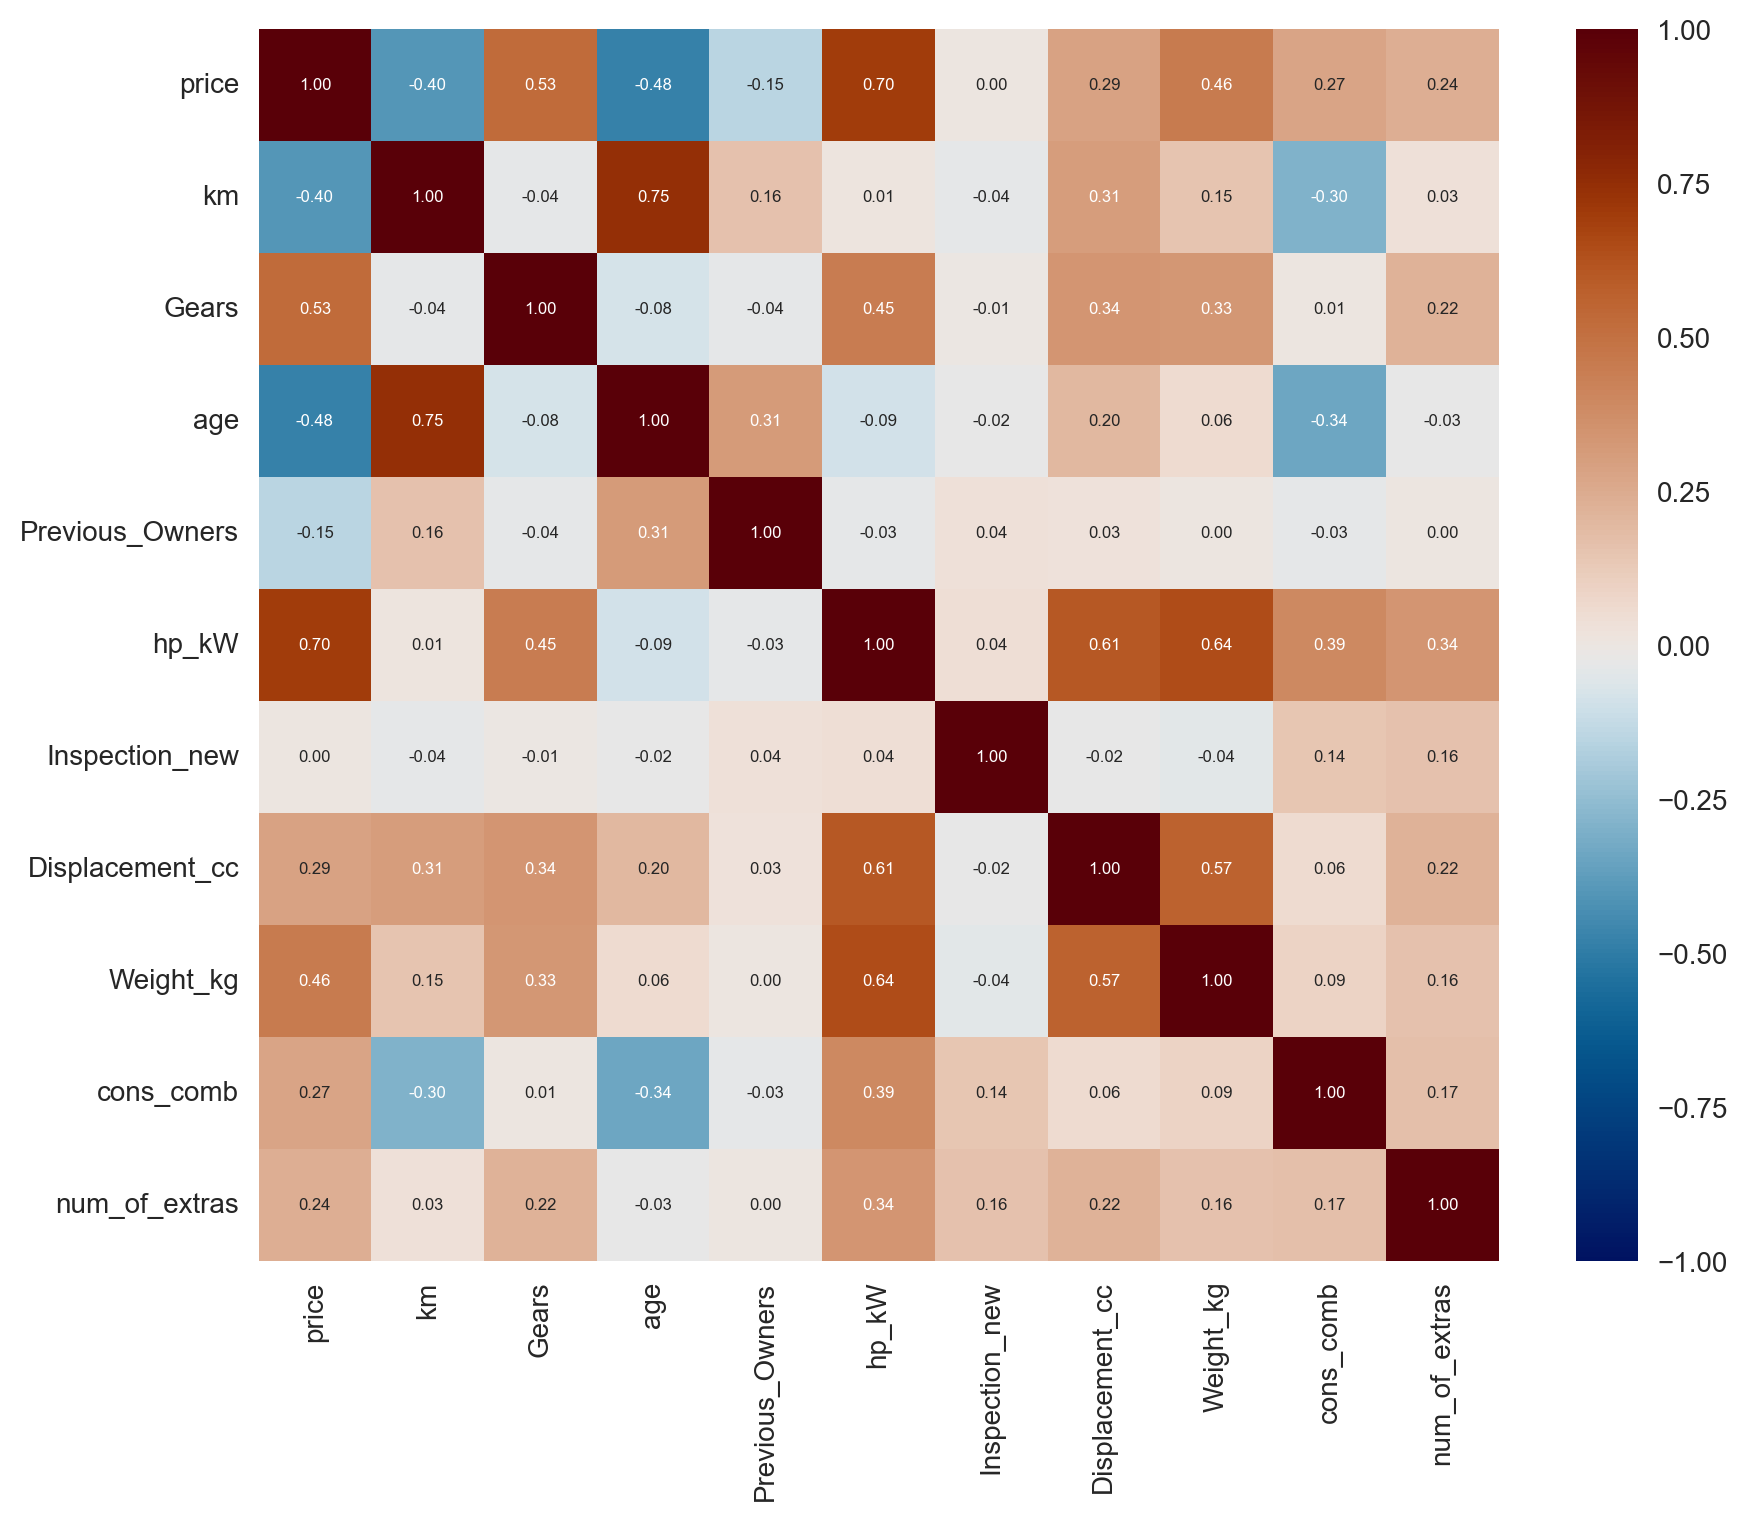

In [132]:
import seaborn as sns
plt.figure(figsize=(10,8), dpi=200)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='cmc.vik', vmin=-1, vmax=1, fmt='.2f', annot_kws={'fontsize': 6});

In [55]:
pd.DataFrame(df.select_dtypes('number').agg(['min', 'max']))

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
min,4950,0.00,5.00,0.00,0.00,40.00,0,890.00,840.00,3.00
max,74600,"317,000.00",8.00,3.00,4.00,294.00,1,"2,967.00","2,471.00",9.10


In [56]:
df.age.unique()

array([3., 2., 1., 0.])

In [57]:
df.Gearing_Type.unique()

array(['Automatic', 'Manual', 'Semi-automatic'], dtype=object)

In [58]:
df.make_model.unique()

array(['Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', 'Opel Corsa',
       'Opel Insignia', 'Renault Clio', 'Renault Duster',
       'Renault Espace'], dtype=object)

In [59]:
df.Gears.unique()

array([7., 6., 5., 8.])

In [60]:
df.make_model.value_counts()

make_model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Renault Duster      20
Audi A2              1
Name: count, dtype: int64

In [28]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
2377,Audi A2,Off-Road,28200,VAT deductible,"26,166.00",Employee's car,Diesel,6.00,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",1.00,1.00,85.00,0,Metallic,Cloth,Manual,"1,598.00","1,135.00",front,4.90


In [61]:
df.drop(index=[2377], inplace =True)

In [62]:
df.reset_index(drop=True, inplace=True)

In [64]:
df.make_model.unique()

array(['Audi A1', 'Audi A3', 'Opel Astra', 'Opel Corsa', 'Opel Insignia',
       'Renault Clio', 'Renault Duster', 'Renault Espace'], dtype=object)

In [65]:
df.Inspection_new.value_counts()

Inspection_new
0    10591
1     3650
Name: count, dtype: int64

In [66]:
df.Previous_Owners.value_counts()

Previous_Owners
1.00    12699
2.00     1014
0.00      497
3.00       29
4.00        2
Name: count, dtype: int64

## Feature Engineering

In [67]:
df.sample(1)

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
2784,Audi A3,Sedans,15400,VAT deductible,"59,675.00",Used,Diesel,6.00,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Alarm system,Central door lock,Central doo...",3.00,1.00,81.00,0,Metallic,Cloth,Manual,"1,598.00","1,315.00",front,3.40


### Comfort Convenience

In [68]:
# GPT-4 categorization
standard = ['Air conditioning', 'Armrest', 'Cruise control', 'Electrical side mirrors', 'Fold flat passenger seat', 'Multi-function steering wheel', 'Power windows', 'Start-stop system', 'Tinted windows', 'Wind deflector', 'Hill Holder', 'Leather steering wheel', 'Light sensor', '2 zones']
premium = ['Automatic climate control', '3 zones', 'Navigation system', 'Seat heating', 'Split rear seats', 'Sunroof', 'Air suspension', 'Auxiliary heating', 'Electrically adjustable seats', 'Heads-up display', 'Heated steering wheel', 'Keyless central door lock', 'Lumbar support', 'Panorama roof', 'Parking assist system camera', 'Parking assist system sensors front', 'Parking assist system sensors rear', 'Rain sensor', 'Electric tailgate', '360° camera', 'Park Distance Control', 'Sliding door right', 'Sliding door left']
premium_plus = ['Electrically heated windshield', 'Parking assist system self-steering', 'Seat ventilation', 'Massage seats', 'Electric backseat adjustment', '4 zones', 'Leather seats']



In [69]:
from functools import reduce


def is_premium_plus(m):
    boollist = list(map(lambda x: x in m, premium_plus))
    return reduce(lambda x,y: x or y, boollist)

def is_premium(m):
    boollist = list(map(lambda x: x in m, premium))
    return reduce(lambda x,y: x or y, boollist)

def package_type_cc(f):
    if pd.isna(f):
        return np.nan
    elif is_premium_plus(f): 
        return 'premium_plus'
    elif is_premium(f):
        return 'premium'
    else:
        return 'standard'
df['cc'] = df.Comfort_Convenience.apply(package_type_cc)

In [70]:
df.cc.value_counts()

cc
premium         10305
premium_plus     2091
standard         1845
Name: count, dtype: int64

### Safety Security

In [71]:
# Bing categorization
ss_standard2 = ['ABS', 'Central door lock', 'Driver-side airbag', 'Electronic stability control', 'Traction control', 'Isofix', 'Fog lights', 'Immobilizer', 'Passenger-side airbag', 'Power steering', 'Side airbag', 'Speed limit control system', 'Emergency brake assistant', 'Alarm system', 'Central door lock with remote control', 'Tire pressure monitoring system', 'Daytime running lights']
ss_premium2 = ['Xenon headlights', 'Bi-Xenon headlights', 'Head airbag', 'LED Daytime Running Lights', 'LED Headlights', 'Lane departure warning system', 'Traffic sign recognition', 'Full-LED headlights', 'Distance warning system', 'Driver drowsiness detection', 'Emergency system', 'Rear airbag', 'Adaptive Cruise Control', 'Blind spot monitor']
ss_premium_plus2 = ['Glare-free high beam headlights', 'Adaptive headlights', 'Laser headlights', 'Night view assist']

In [72]:
from functools import reduce

def is_premium_plus_ss(m):
    boollist = list(map(lambda x: x in m, ss_premium_plus2))
    return reduce(lambda x,y: x or y, boollist)

def is_premium_ss(m):
    boollist = list(map(lambda x: x in m, ss_premium2))
    return reduce(lambda x,y: x or y, boollist)

def package_type_ss(f):
    if pd.isna(f):
        return np.nan
    elif is_premium_plus_ss(f): 
        return 'Safety Security Premium Plus'
    elif is_premium_ss(f):
        return 'Safety Security Premium'
    else:
        return 'Safety Security Standard'
df['ss'] = df.Safety_Security.apply(package_type_ss)

In [73]:
df.ss.value_counts()

ss
Safety Security Premium         7630
Safety Security Standard        4590
Safety Security Premium Plus    2021
Name: count, dtype: int64

### Entertainment Media

In [74]:
# Bing categorization
em_standard = ['USB', 'Bluetooth', 'CD player', 'MP3', 'On-board computer', 'Radio', 'Digital cockpit', 'Hands-free equipment', 'Sound system', 'Digital radio']
em_premium = ['Android Auto', 'Apple CarPlay', 'Induction charging for smartphones', 'Integrated music streaming', 'WLAN / WiFi hotspot', 'Television']

In [75]:
from functools import reduce

def is_premium_em(m):
    boollist = list(map(lambda x: x in m, em_premium))
    return reduce(lambda x,y: x or y, boollist)

def package_type_em(f):
    if pd.isna(f):
        return np.nan
    elif is_premium_em(f):
        return 'Entertainment Media Premium'
    else:
        return 'Entertainment Media Standard'
df['em'] = df.Entertainment_Media.apply(package_type_em)

### Extras

In [76]:
df.Extras.value_counts()

Extras
Alloy wheels                                                                                               5009
Alloy wheels,Touch screen                                                                                   609
Alloy wheels,Voice Control                                                                                  535
Roof rack                                                                                                   511
Alloy wheels,Touch screen,Voice Control                                                                     509
                                                                                                           ... 
Alloy wheels,Handicapped enabled,Shift paddles,Voice Control                                                  1
Alloy wheels,Handicapped enabled,Shift paddles                                                                1
Alloy wheels,Catalytic Converter,Shift paddles,Sport package,Sport seats,Sport suspension,Voice C

In [77]:
df["num_of_extras"] = df["Extras"].apply(lambda x: x.count(",")).add(1)

In [78]:
df.drop(columns=['Comfort_Convenience','Entertainment_Media','Extras','Safety_Security'],inplace=True)

In [79]:
df.sample(1)

,make_model,body_type,price,vat,km,Type,Fuel,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,cc,ss,em,num_of_extras
13455,Renault Espace,Van,24999,VAT deductible,"5,600.00",Used,Diesel,6.00,2.00,2.00,118.00,0,Metallic,Cloth,Automatic,"1,598.00","1,734.00",front,4.70,premium,Safety Security Premium,Entertainment Media Standard,1


## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

In [80]:
X= df.drop(columns="price")
y= df.price

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
X_train.shape, X_test.shape

((11392, 22), (2849, 22))

## Implement Catboost

In [83]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
                        "mae" : mean_absolute_error(y_train, y_train_pred),
                        "mse" : mean_squared_error(y_train, y_train_pred),
                        "rmse" : mean_squared_error(y_train, y_train_pred, squared=False)},
              "test": {"R2" : r2_score(y_test, y_pred),
                       "mae" : mean_absolute_error(y_test, y_pred),
                       "mse" : mean_squared_error(y_test, y_pred),
                       "rmse" : mean_squared_error(y_test, y_pred, squared=False)}}
    
    return pd.DataFrame(scores)

# train ve test setinin metriclerini karşılaştırabilmek için fonksiyonumuzu tanımlıyoruz.

In [84]:
cat_features = df.select_dtypes('object').columns.tolist()
cat_features.append('Inspection_new')

In [85]:
cat_features

['make_model',
 'body_type',
 'vat',
 'Type',
 'Fuel',
 'Paint_Type',
 'Upholstery_type',
 'Gearing_Type',
 'Drive_chain',
 'cc',
 'ss',
 'em',
 'Inspection_new']

In [89]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(iterations=100, learning_rate=0.1, loss_function='RMSE', cat_features= cat_features)
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=10,verbose=100)

# linear modelimizi kurup train datası üzerinde eğitiyoruz.

0:	learn: 6883.1345904	test: 6788.2226684	best: 6788.2226684 (0)	total: 25.4ms	remaining: 2.52s
99:	learn: 1865.3338773	test: 1941.1584282	best: 1941.1584282 (99)	total: 1.11s	remaining: 0us

bestTest = 1941.158428
bestIteration = 99



In [90]:
train_val(cat_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.94,0.93
mae,"1,244.15","1,243.86"
mse,"3,455,205.03","3,768,096.04"
rmse,"1,858.82","1,941.16"


In [91]:
1941/df.price.mean()

# Müşteriye vereceğimiz test seti (hold out set) skorundan aldığımız rmse skoruna göre modelimiz ortalama %10 hata yapıyor.

0.10723602684820023

### Cross Validate

In [92]:
model = CatBoostRegressor(iterations=100, learning_rate=0.1, loss_function='RMSE', cat_features= cat_features)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=['r2', 
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'], 
                        cv =10,
                        return_train_score=True)

# daha önceki derslerimizde öğrendiğimiz gibi overfiting kontrolünü cross validaition üzerinden aldığımız train ve 
# validation scorlarını karşılaştırarak yapıyoruz.

0:	learn: 6913.7820942	total: 21ms	remaining: 2.08s
1:	learn: 6458.0756124	total: 28.9ms	remaining: 1.42s
2:	learn: 6047.6621419	total: 44.7ms	remaining: 1.45s
3:	learn: 5667.2558918	total: 52.6ms	remaining: 1.26s
4:	learn: 5339.3045165	total: 62.8ms	remaining: 1.19s
5:	learn: 5044.1833618	total: 73.9ms	remaining: 1.16s
6:	learn: 4779.1066359	total: 80.1ms	remaining: 1.06s
7:	learn: 4542.7503113	total: 87.4ms	remaining: 1s
8:	learn: 4335.7649432	total: 97.2ms	remaining: 983ms
9:	learn: 4148.2187464	total: 113ms	remaining: 1.02s
10:	learn: 3937.1640971	total: 118ms	remaining: 957ms
11:	learn: 3740.3314525	total: 131ms	remaining: 963ms
12:	learn: 3571.6534076	total: 143ms	remaining: 957ms
13:	learn: 3408.0852095	total: 195ms	remaining: 1.2s
14:	learn: 3277.7254830	total: 209ms	remaining: 1.18s
15:	learn: 3162.6322202	total: 224ms	remaining: 1.18s
16:	learn: 3064.9785898	total: 240ms	remaining: 1.17s
17:	learn: 2983.7813409	total: 254ms	remaining: 1.16s
18:	learn: 2896.2267461	total: 267m

In [93]:
pd.DataFrame(scores).iloc[:, 2:].mean()

# train ve validaiton seti ile train seti arasındaki skorların biribirine yakın olduğunu görüyoruz. Overfiting yoktur.

test_r2                                      0.93
train_r2                                     0.94
test_neg_mean_absolute_error            -1,296.28
train_neg_mean_absolute_error           -1,244.83
test_neg_mean_squared_error         -3,953,617.81
train_neg_mean_squared_error        -3,449,602.39
test_neg_root_mean_squared_error        -1,985.72
train_neg_root_mean_squared_error       -1,857.24
dtype: float64

### Adjusted R2 Score

In [94]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

# datamızda çok fazla featura var fakat yeteri kadar satır yoksa bu durum modelimizin R2_scorunda yalancı bir iyileştirme 
# yapar. Özellikle bu tür datalarda veya datamıza çok fazla yeni feature (dummies feature gibi) ilave olduysa mutlaka 
# adjusted R2_score ile gerçek R2_score tespit etmemiz gerekiyor.

# Adjusted R2_score satır ve feature sayısı arasında ki trade off'u kontrol ederek bize bir skore döndürür. Eğer sayılar 
# arasında büyük bir dengesizlik varsa adjusted_R2_scorunda ciddi düşüşler olacaktır. Adjusted R2 Score için yukardaki
# fonksiyonu tanımlıyoruz.

In [95]:
y_pred = cat_model.predict(X_test)

# yukarda tanımladığımız fonksiyon içerisinde kullanmak için modelden predictionlarımızı (y_pred) alıyoruz.

In [96]:
adj_r2(y_test, y_pred, X)

# gerekli parametreleri fonksiyona vererek skorumuzu elde ediyoruz.

0.9300209801744477

### Prediction Error with Outliers

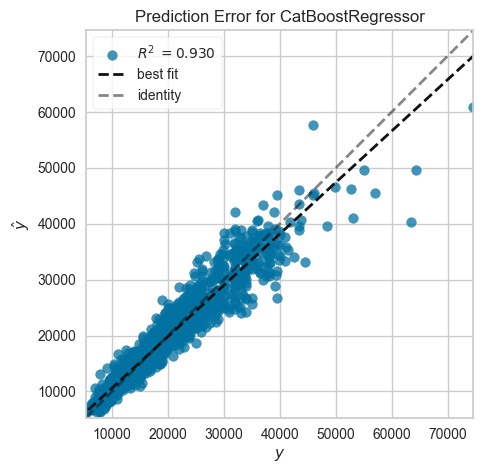

In [97]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz
from yellowbrick.contrib.wrapper import wrap

visualizer = RadViz(size=(500, 1000))
catboost_model = CatBoostRegressor(iterations=100, learning_rate=0.1, loss_function='RMSE', cat_features= cat_features)
model = wrap(cat_model)
visualizer = PredictionError(model)
#visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

# prediciton error görseli ile modelimizin yaptığı tahminlerin ne kadar iyi olup olmadığını görebiliyoruz. Aşağıdaki
# görsele baktığımızda 70 bin EURO ve üzerindeki fiyatlı arabaların best fit linemızı aşağıya doğru çektiğini görebiliyoruz
# Eğer ben datadan scorlarımı bozduğunu gördüğüm çok düşük fiyatlı arabalar ile 70 bin EURO ve üzerindeki arabaları 
# veya modeller bazında tespit ettiğim outlier fiyatlı arabaları datamdan drop edip bu data üzerinden yeniden modeli 
# eğittiğimde daha iyi scorlar alabilirim.

# Biz bu notebookumuzda çok düşük fiyatlı arabalar ile 70.000 EURO üzerindeki arabaları drop ederek devam edeceğiz.

### Feature importance

Text(0.5, 1.0, 'Feature Importance')

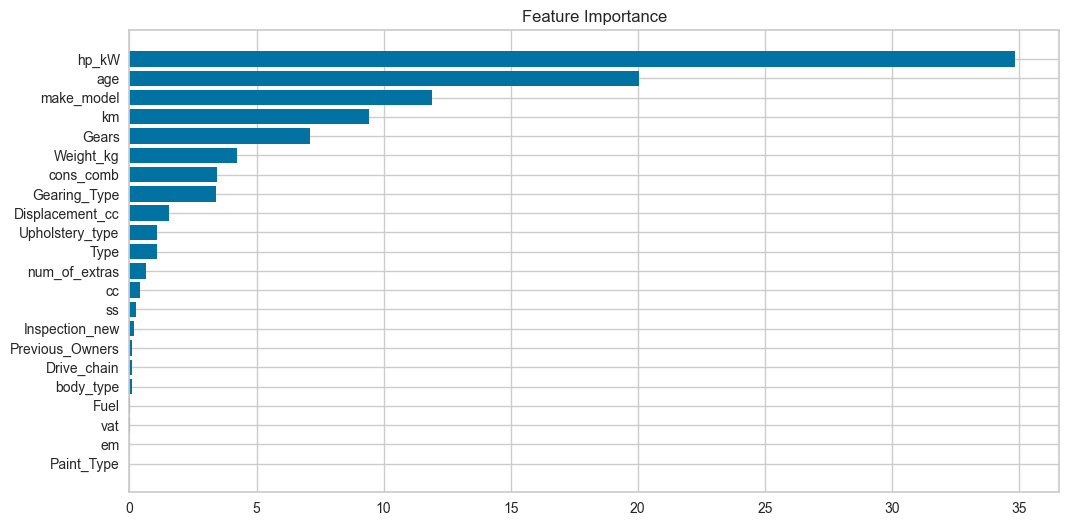

In [98]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


Text(0.5, 1.0, 'Permutation Importance')

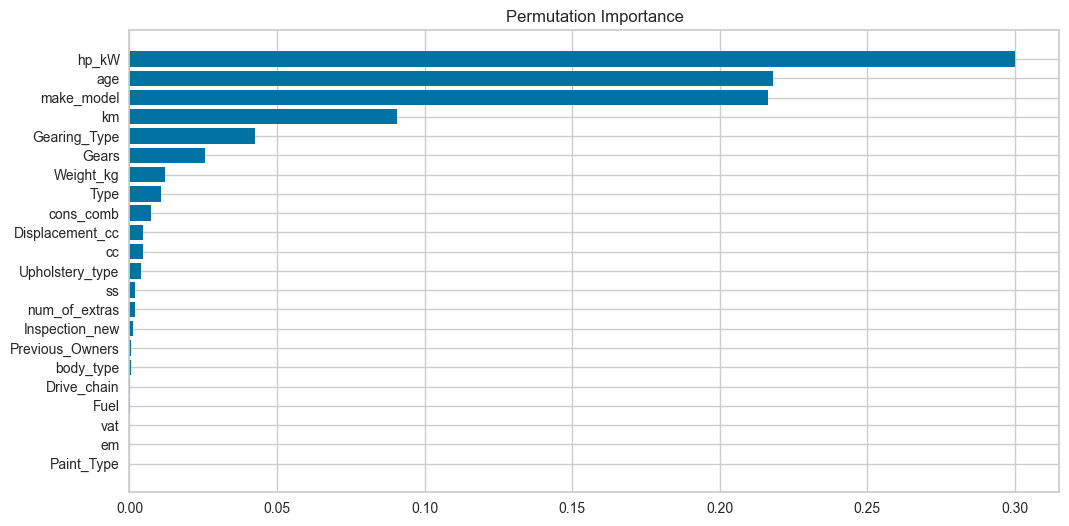

In [99]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance')


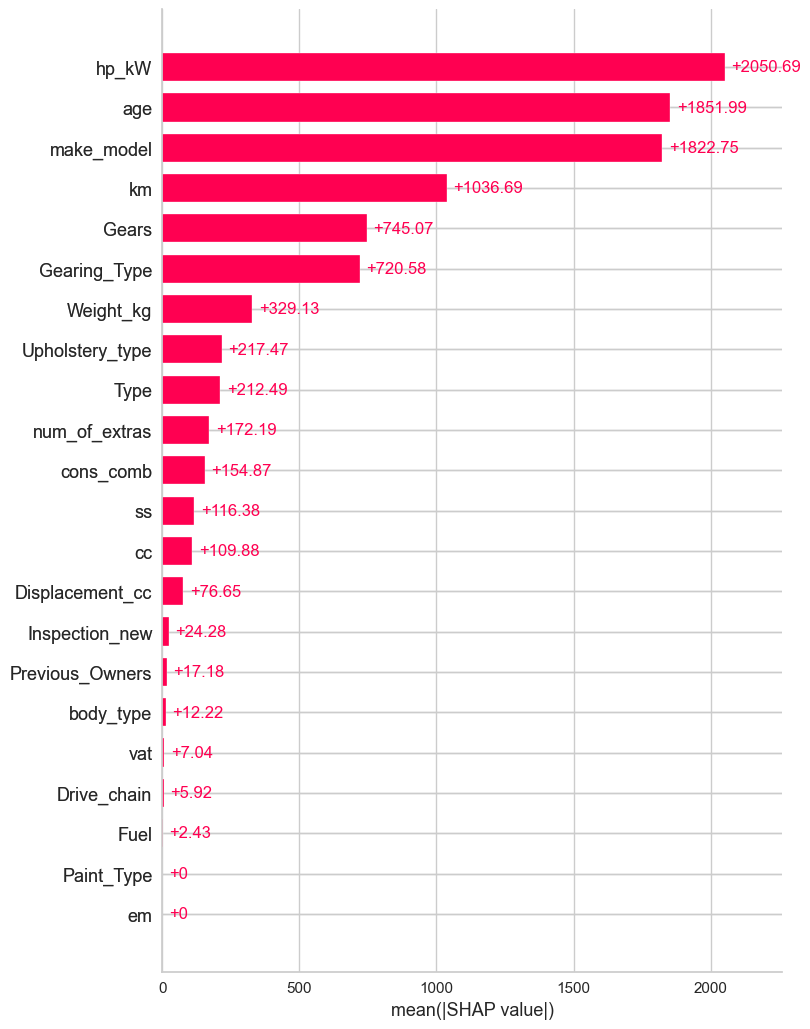

In [100]:
# https://www.rasgoml.com/feature-engineering-tutorials/how-to-generate-feature-importance-plots-using-catboost
explainer = shap.Explainer(cat_model)
shap_values = explainer(X_test)
shap.plots.bar(shap_values, max_display=X_test.shape[0])

In [101]:
new_list= ["hp_kW", "age", 'make_model', "km", "Gearing_Type"]

<Axes: xlabel='importance', ylabel='feature'>

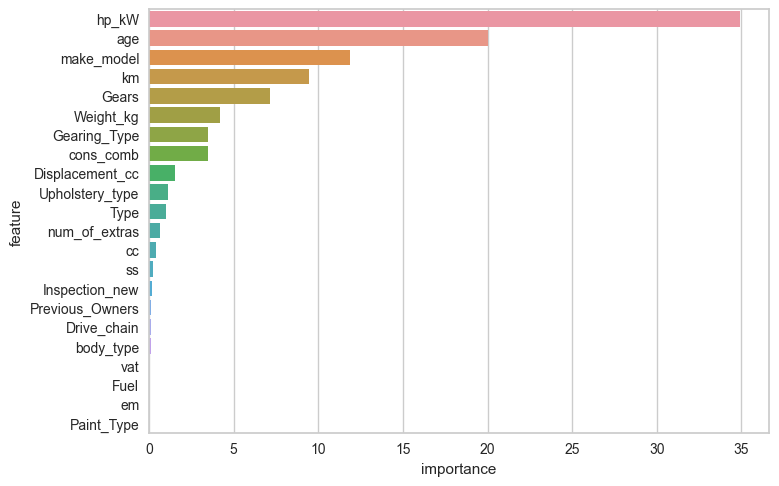

In [102]:
# Another way
from catboost import Pool
# Get the feature importances
feature_importances = cat_model.get_feature_importance(Pool(X_train,y_train, cat_features=cat_features))

# Create a dataframe of feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the features by importance
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)

# Create a bar plot of feature importances
sns.barplot(x='importance', y='feature', data=feature_importances_df)

In [103]:
X=df[new_list]
y=df['price']

In [104]:
X.sample(5)

,hp_kW,age,make_model,km,Gearing_Type
3436,85.00,1.00,Audi A3,"26,151.00",Automatic
7602,66.00,1.00,Opel Corsa,"6,600.00",Automatic
13427,118.00,1.00,Renault Espace,"34,109.00",Automatic
8567,51.00,2.00,Opel Corsa,"46,000.00",Manual
6918,110.00,0.00,Opel Astra,"5,000.00",Automatic


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [106]:
cat_features = X_train.select_dtypes("object").columns.tolist()
cat_features

['make_model', 'Gearing_Type']

In [107]:
X_train.iloc[1]

hp_kW                   165.00
age                       0.00
make_model      Renault Espace
km                    1,647.36
Gearing_Type         Automatic
Name: 13804, dtype: object

## Remodel based on Feature importance

In [108]:
from catboost import CatBoostRegressor

cat_model2 = CatBoostRegressor(iterations=100, learning_rate=0.1, loss_function='RMSE', cat_features= cat_features)
cat_model2.fit(X_train, y_train)

# linear modelimizi kurup train datası üzerinde eğitiyoruz.

0:	learn: 6987.2783510	total: 14.9ms	remaining: 1.47s
1:	learn: 6520.4566567	total: 20.1ms	remaining: 984ms
2:	learn: 6109.3908578	total: 28.7ms	remaining: 928ms
3:	learn: 5771.0515538	total: 36ms	remaining: 864ms
4:	learn: 5455.1192816	total: 49.1ms	remaining: 934ms
5:	learn: 5172.7525221	total: 64.2ms	remaining: 1.01s
6:	learn: 4938.5469544	total: 70.7ms	remaining: 939ms
7:	learn: 4719.0951782	total: 81ms	remaining: 932ms
8:	learn: 4533.0017650	total: 85.6ms	remaining: 866ms
9:	learn: 4281.3757241	total: 92.4ms	remaining: 832ms
10:	learn: 4047.9298997	total: 98.6ms	remaining: 798ms
11:	learn: 3844.9661582	total: 107ms	remaining: 784ms
12:	learn: 3678.4833785	total: 111ms	remaining: 744ms
13:	learn: 3528.7077323	total: 119ms	remaining: 733ms
14:	learn: 3385.0316315	total: 130ms	remaining: 734ms
15:	learn: 3267.8821791	total: 136ms	remaining: 716ms
16:	learn: 3131.6625462	total: 142ms	remaining: 696ms
17:	learn: 3026.4832821	total: 147ms	remaining: 671ms
18:	learn: 2924.1365029	total: 

In [109]:
train_val(cat_model2, X_train, y_train, X_test, y_test)

,train,test
R2,0.93,0.93
mae,"1,289.21","1,234.28"
mse,"4,116,485.01","3,516,114.99"
rmse,"2,028.91","1,875.13"


In [110]:
1875/df.price.mean()

# Müşteriye vereceğimiz test seti (hold out set) skorundan aldığımız rmse skoruna göre modelimiz ortalama %10 hata yapıyor.

0.103589670448416

### Cross Validate

In [111]:
model = CatBoostRegressor(iterations=100, learning_rate=0.1, loss_function='RMSE', cat_features= cat_features)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=['r2', 
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'], 
                        cv =10,
                        return_train_score=True)

# daha önceki derslerimizde öğrendiğimiz gibi overfiting kontrolünü cross validaition üzerinden aldığımız train ve 
# validation scorlarını karşılaştırarak yapıyoruz.

0:	learn: 6960.8412489	total: 8ms	remaining: 792ms
1:	learn: 6511.4852404	total: 11.7ms	remaining: 573ms
2:	learn: 6120.4016778	total: 15ms	remaining: 486ms
3:	learn: 5756.1149205	total: 52.4ms	remaining: 1.26s
4:	learn: 5457.3317866	total: 94.8ms	remaining: 1.8s
5:	learn: 5177.6392879	total: 97.9ms	remaining: 1.53s
6:	learn: 4933.3322750	total: 105ms	remaining: 1.4s
7:	learn: 4727.5388934	total: 109ms	remaining: 1.25s
8:	learn: 4564.9889707	total: 112ms	remaining: 1.13s
9:	learn: 4310.6798894	total: 121ms	remaining: 1.08s
10:	learn: 4088.5411358	total: 127ms	remaining: 1.02s
11:	learn: 3899.2506568	total: 131ms	remaining: 960ms
12:	learn: 3730.3153479	total: 140ms	remaining: 936ms
13:	learn: 3572.4812996	total: 143ms	remaining: 879ms
14:	learn: 3433.5360462	total: 146ms	remaining: 828ms
15:	learn: 3292.5388233	total: 156ms	remaining: 819ms
16:	learn: 3166.4931742	total: 160ms	remaining: 780ms
17:	learn: 3054.7368128	total: 164ms	remaining: 745ms
18:	learn: 2966.0689445	total: 169ms	re

In [112]:
pd.DataFrame(scores).iloc[:, 2:].mean()

# train ve validaiton seti ile train seti arasındaki skorların biribirine yakın olduğunu görüyoruz. Overfiting yoktur.

test_r2                                      0.92
train_r2                                     0.93
test_neg_mean_absolute_error            -1,332.48
train_neg_mean_absolute_error           -1,299.73
test_neg_mean_squared_error         -4,507,288.34
train_neg_mean_squared_error        -4,147,218.79
test_neg_root_mean_squared_error        -2,120.21
train_neg_root_mean_squared_error       -2,036.43
dtype: float64

In [113]:
y_pred = cat_model2.predict(X_test)

# yukarda tanımladığımız fonksiyon içerisinde kullanmak için modelden predictionlarımızı (y_pred) alıyoruz.

In [114]:
adj_r2(y_test, y_pred, X)

# gerekli parametreleri fonksiyona vererek skorumuzu elde ediyoruz.

0.9297584588985127

In [115]:
import pickle
pickle.dump(cat_model2, open('cat_model', 'wb'))

**deployment**

In [116]:
model_deploy = pickle.load(open('cat_model', 'rb'))

In [117]:
columns=list(X.columns)
columns

['hp_kW', 'age', 'make_model', 'km', 'Gearing_Type']

In [118]:
X_test.sample(1)

,hp_kW,age,make_model,km,Gearing_Type
9771,100.00,3.00,Opel Insignia,"111,000.00",Automatic


In [119]:
y_test.loc[6031]

17300

In [120]:
my_dict = {
    "hp_kW": 77.0,
    "age": 2.0,
    "make_model": 'Opel Astra',
    "km": 58000.0,
    "Gearing_Type":"Automatic"
}
    
    

In [121]:
df_ex = pd.DataFrame.from_dict([my_dict])

In [122]:
df_ex

,hp_kW,age,make_model,km,Gearing_Type
0,77.00,2.00,Opel Astra,"58,000.00",Automatic


In [123]:
X_test.sample(1)

,hp_kW,age,make_model,km,Gearing_Type
10039,100.00,3.00,Opel Insignia,"89,500.00",Manual


In [124]:
prediction = cat_model2.predict(df_ex)
print(prediction)

[14305.1658618]


In [125]:
print("The estimated price of your car is €{}. ".format(int(prediction[0])))

The estimated price of your car is €14305. 


In [ ]:
#!streamlit run my_app.py